# 1.1

Il numero di istanze nel dataset sono: 614
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64


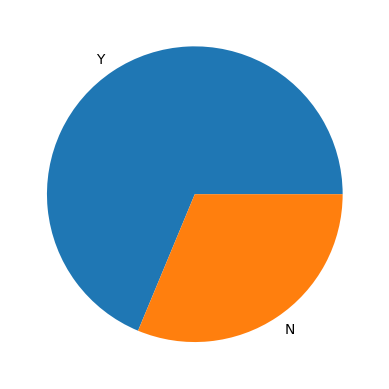

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('loan_sanction_train.csv')
print(f'Il numero di istanze nel dataset sono: {df.shape[0]}')
print(df.isna().sum())
print(df['Loan_Status'].value_counts(normalize=True))

labels = df['Loan_Status'].unique()
plt.pie(df['Loan_Status'].value_counts(), labels=labels)
plt.show()

Le classi sono sbilanciate in favore di Y e nel dataset sono presenti alcuni Missing Values

# 1.2

Male      0.813644
Female    0.186356
Name: Gender, dtype: float64


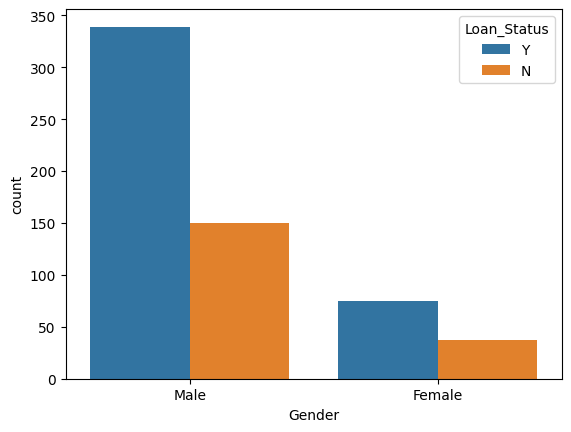

Married,No,Yes
Gender,,
Female,0.637500,0.741935
Male,0.623077,0.717087


In [2]:
print(df['Gender'].value_counts(normalize=True))

sns.countplot(df, x='Gender', hue='Loan_Status')
plt.show()

maps = {
    'Y' : 1,
    'N' : 0
}

df.replace(maps, inplace=True)

df.pivot_table(index='Gender', columns='Married')['Loan_Status']

Per verificare se le persone di sesso femminile hanno più difficoltà a restituire il prestito va prima verificato il numero di istanze per genere (se uomo o donna), nel dataset si nota un forte sbilanciamento nei numeri a favore degli uomini. Dal grafico si evince comunque che in percentuale le donne hanno più difficoltà a restituire il prestito

# 1.3

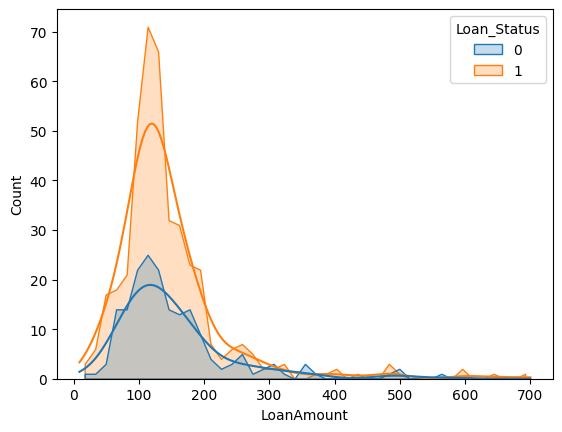

In [3]:
sns.histplot(df, x='LoanAmount', hue='Loan_Status', kde=True, element='poly')
plt.show()

Gli andamenti delle curve medie all'aumentare del valore del prestito diventano sempre più vicine 

# 1.4

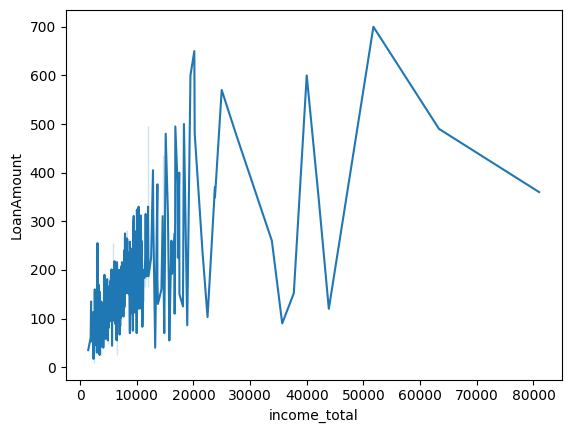

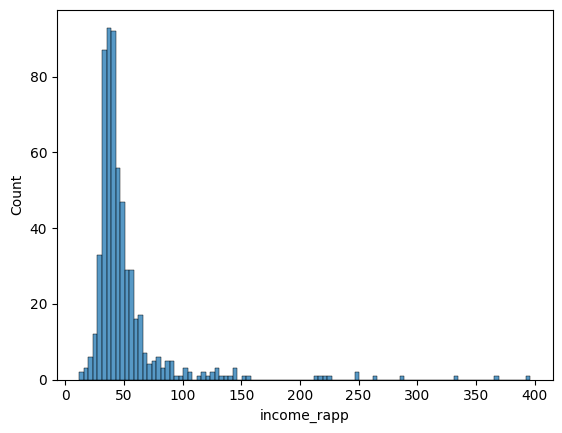

In [4]:
df_income = df.copy()
df_income['income_total'] = df_income['ApplicantIncome']+df_income['CoapplicantIncome']
sns.lineplot(df_income, x='income_total', y='LoanAmount')
plt.show()

df_income['income_rapp'] = df_income['income_total']/df_income['LoanAmount']
sns.histplot(df_income, x='income_rapp')
plt.show()

# 2.1

Predizione decision tree Test: 0.66875 Train: 1.0


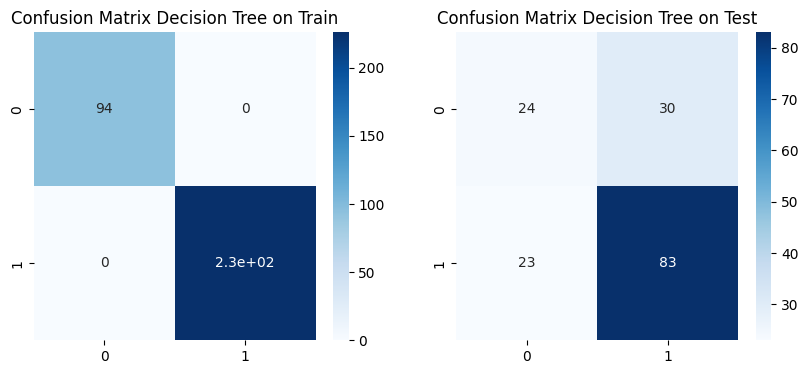

Predizione decision KNeighbors Test: 0.625 Train: 0.75625


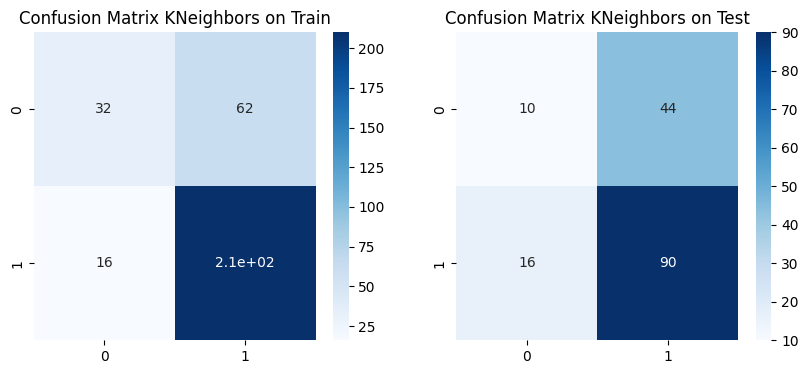

Predizione decision dummy Test: 0.6625 Train: 0.70625


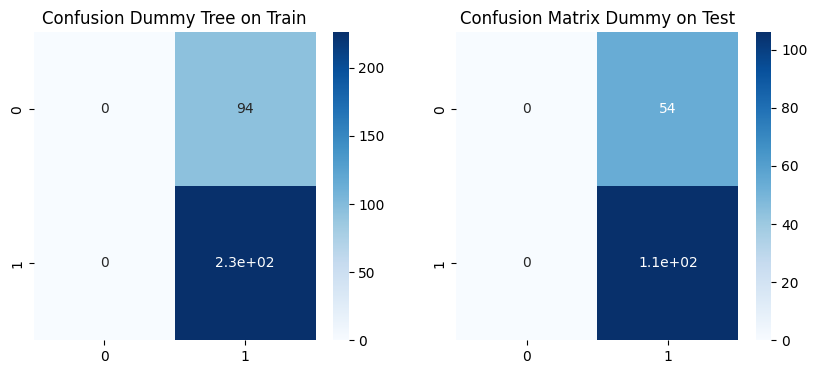

In [5]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('loan_sanction_train.csv')
df.drop('Loan_ID',axis=1, inplace=True)
df.dropna(inplace=True)

maps = {
    'Y' : 1,
    'N' : 0
}

df.replace(maps, inplace=True)

X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

enc = OrdinalEncoder()
df_num = enc.fit_transform(X)

X = pd.DataFrame(df_num, columns=enc.get_feature_names_out())

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=1/3, random_state=0)

tree = DecisionTreeClassifier()

tree.fit(X_train, y_train)

test_pred = tree.predict(X_test)
train_pred = tree.predict(X_train)
print(f'Predizione decision tree Test: {accuracy_score(y_test, test_pred)} Train: {accuracy_score(y_train, train_pred)}')

fig, axes = plt.subplots(1,2)
fig.set_figheight(4)
fig.set_figwidth(10)
axes[0].set_title('Confusion Matrix Decision Tree on Train')
sns.heatmap(confusion_matrix(y_true=y_train, y_pred=train_pred), annot=True, cmap='Blues', ax=axes[0])
axes[1].set_title('Confusion Matrix Decision Tree on Test')
sns.heatmap(confusion_matrix(y_true=y_test, y_pred=test_pred), annot=True, cmap='Blues', ax=axes[1])
plt.show()

knei = KNeighborsClassifier()

knei.fit(X_train, y_train)

test_pred = knei.predict(X_test)
train_pred = knei.predict(X_train)
print(f'Predizione decision KNeighbors Test: {accuracy_score(y_test, test_pred)} Train: {accuracy_score(y_train, train_pred)}')

fig, axes = plt.subplots(1,2)
fig.set_figheight(4)
fig.set_figwidth(10)
axes[0].set_title('Confusion Matrix KNeighbors on Train')
sns.heatmap(confusion_matrix(y_true=y_train, y_pred=train_pred), annot=True, cmap='Blues', ax=axes[0])
axes[1].set_title('Confusion Matrix KNeighbors on Test')
sns.heatmap(confusion_matrix(y_true=y_test, y_pred=test_pred), annot=True, cmap='Blues', ax=axes[1])
plt.show()

dummy = DummyClassifier()

dummy.fit(X_train, y_train)

test_pred = dummy.predict(X_test)
train_pred = dummy.predict(X_train)
print(f'Predizione decision dummy Test: {accuracy_score(y_test, test_pred)} Train: {accuracy_score(y_train, train_pred)}')

fig, axes = plt.subplots(1,2)
fig.set_figheight(4)
fig.set_figwidth(10)
axes[0].set_title('Confusion Dummy Tree on Train')
sns.heatmap(confusion_matrix(y_true=y_train, y_pred=train_pred), annot=True, cmap='Blues', ax=axes[0])
axes[1].set_title('Confusion Matrix Dummy on Test')
sns.heatmap(confusion_matrix(y_true=y_test, y_pred=test_pred), annot=True, cmap='Blues', ax=axes[1])
plt.show()

# Considerazioni 
Ho eliminato la colonna Loan_ID in quanto rappresentava un id per il dataset. Per quanto riguarda la performance dei vari modelli si deve tener conto che la classe da predire è sbilanciata e per questo ci viene in aiuto la confusion matrix:
    Per il decision tree si nota come nel training overfitti e in fase di test la sua performance scende parecchio rispetto la classificazione dei 'N'(0) 
    Per il Kneighbors il discorso è molto simile tolto l'overfitting nella fase di train
    Mentre per il Dummy abbiamo una 'rinuncia' a predire valori uguali a 0 in quanto le classi sono molto  sbilanciate

# 2.2

In [6]:
print('Accuracy Decision Tree con Cross Val ',cross_val_score(tree, X, y, cv=10, scoring='accuracy').mean())
print('Accuracy KNeighbors con Cross Val ',cross_val_score(knei, X, y, cv=10, scoring='accuracy').mean())
print('Accuracy Dummy con Cross Val ',cross_val_score(dummy, X, y, cv=10, scoring='accuracy').mean())

Accuracy Decision Tree con Cross Val  0.70625
Accuracy KNeighbors con Cross Val  0.6583333333333334
Accuracy Dummy con Cross Val  0.6916666666666667


c'è un leggero miglioramento nelle accuracy

# 2.3

In [7]:
from sklearn.model_selection import GridSearchCV

param = {
    'n_neighbors': [2,4,5,8],
    'weights': ['uniform', 'distance', None]
    }

gs = GridSearchCV(knei, param_grid=param, scoring='accuracy')

gs.fit(X_train,y_train)
test_pred = gs.predict(X_test)
train_pred = gs.predict(X_train)
print(gs.best_params_)
print(f'Predizione KNeighbors Test: {accuracy_score(y_test, test_pred)} Train: {accuracy_score(y_train, train_pred)}')

{'n_neighbors': 8, 'weights': 'distance'}
Predizione KNeighbors Test: 0.59375 Train: 1.0


Non c'è un grande miglioramento nell'accuracy anche se andrebbe verificata la confusion matrix, di contro in fase di train si nota l'overfitting

# 2.4

Predizione decision tree Test: 0.7241379310344828 Train: 1.0
La probabilità di predirre 0 nelle donne è: 0.5862068965517242


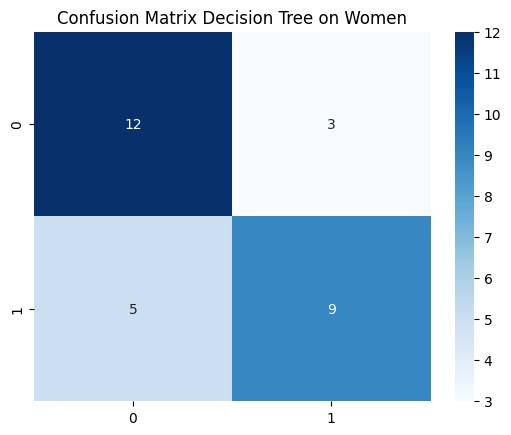

Predizione decision tree Test: 0.7045454545454546 Train: 1.0
La probabilità di predirre 0 negli uomini è: 0.3560606060606061


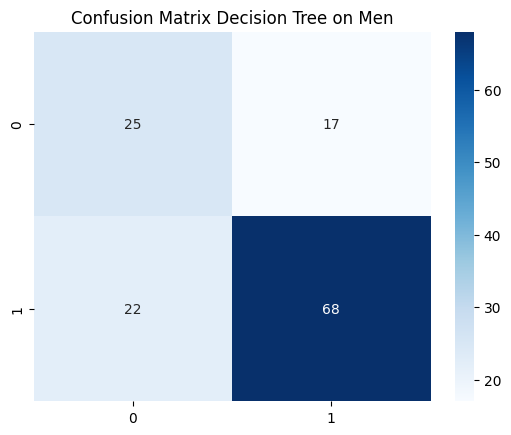

In [8]:
df_women = df[df['Gender'] == 'Female']
df_men = df[df['Gender'] == 'Male']

XW = df_women.drop('Loan_Status', axis=1)
yw = df_women['Loan_Status']

enc = OrdinalEncoder()
df_num = enc.fit_transform(XW)

XW = pd.DataFrame(df_num, columns=enc.get_feature_names_out())

XW_train, XW_test, yw_train, yw_test = train_test_split(XW, yw, test_size=1/3, random_state=0)

tree.fit(XW_train, yw_train)

test_pred = tree.predict(XW_test)
train_pred = tree.predict(XW_train)
print(f'Predizione decision tree Test: {accuracy_score(yw_test, test_pred)} Train: {accuracy_score(yw_train, train_pred)}')
prob = test_pred.sum()/test_pred.size
print(f'La probabilità di predirre 0 nelle donne è: {1 - prob}')
plt.title('Confusion Matrix Decision Tree on Women')
sns.heatmap(confusion_matrix(y_true=yw_test, y_pred=test_pred), annot=True, cmap='Blues')
plt.show()

XM = df_men.drop('Loan_Status', axis=1)
ym = df_men['Loan_Status']

enc = OrdinalEncoder()
df_num = enc.fit_transform(XM)

XM = pd.DataFrame(df_num, columns=enc.get_feature_names_out())

XM_train, XM_test, ym_train, ym_test = train_test_split(XM, ym, test_size=1/3, random_state=0)

tree.fit(XM_train, ym_train)

test_pred = tree.predict(XM_test)
train_pred = tree.predict(XM_train)
print(f'Predizione decision tree Test: {accuracy_score(ym_test, test_pred)} Train: {accuracy_score(ym_train, train_pred)}')
prob = test_pred.sum()/test_pred.size
print(f'La probabilità di predirre 0 negli uomini è: {1 - prob}')
plt.title('Confusion Matrix Decision Tree on Men')
sns.heatmap(confusion_matrix(y_true=ym_test, y_pred=test_pred), annot=True, cmap='Blues')
plt.show()

Dalla confusion Matrix si nota nel bias a sfavore delle donne 

# 2.4 Continua

Predizione decision tree Test: 0.65625 Train: 1.0


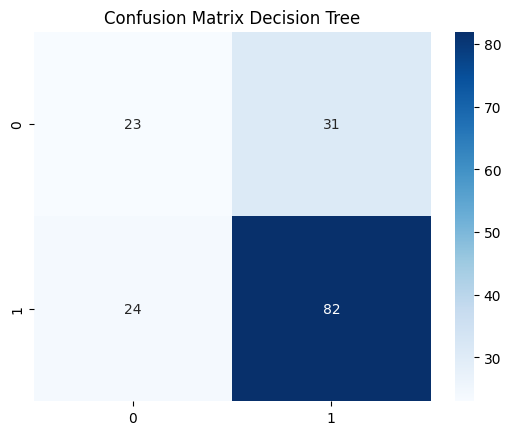

Predizione decision tree Test: 0.69375 Train: 1.0


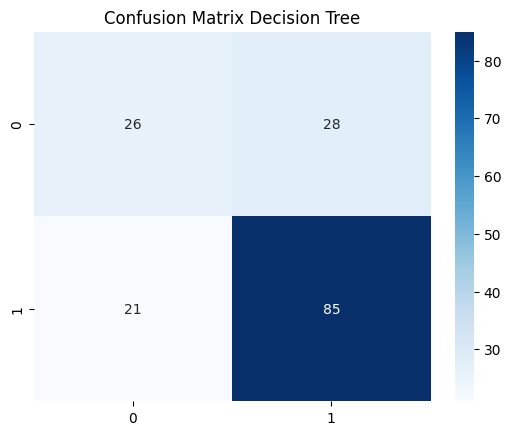

In [9]:
df_parity = df.drop('Gender', axis=1)

XP = df_parity.drop('Loan_Status', axis=1)
yp = df_parity['Loan_Status']

enc = OrdinalEncoder()
df_num = enc.fit_transform(XP)

XP = pd.DataFrame(df_num, columns=enc.get_feature_names_out())

XP_train, XP_test, yp_train, yp_test = train_test_split(XP, yp, test_size=1/3, random_state=0)

tree.fit(XP_train, yp_train)

test_pred = tree.predict(XP_test)
train_pred = tree.predict(XP_train)
print(f'Predizione decision tree Test: {accuracy_score(yp_test, test_pred)} Train: {accuracy_score(yp_train, train_pred)}')
plt.title('Confusion Matrix Decision Tree')
sns.heatmap(confusion_matrix(y_true=yp_test, y_pred=test_pred), annot=True, cmap='Blues')
plt.show()

df_parity = df.drop('Married', axis=1)

XP = df_parity.drop('Loan_Status', axis=1)
yp = df_parity['Loan_Status']

enc = OrdinalEncoder()
df_num = enc.fit_transform(XP)

XP = pd.DataFrame(df_num, columns=enc.get_feature_names_out())

XP_train, XP_test, yp_train, yp_test = train_test_split(XP, yp, test_size=1/3, random_state=0)

tree.fit(XP_train, yp_train)

test_pred = tree.predict(XP_test)
train_pred = tree.predict(XP_train)
print(f'Predizione decision tree Test: {accuracy_score(yp_test, test_pred)} Train: {accuracy_score(yp_train, train_pred)}')
plt.title('Confusion Matrix Decision Tree')
sns.heatmap(confusion_matrix(y_true=yp_test, y_pred=test_pred), annot=True, cmap='Blues')
plt.show()

Si nota un aumento nell'accuracy togliendo i due attributi Gender e Married 

# 2.5

In [11]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer, KBinsDiscretizer
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, chi2

df = pd.read_csv('loan_sanction_train.csv')
df.drop('Loan_ID', axis=1, inplace=True)

num_col = df._get_numeric_data().columns
print(num_col)

trasformers = [
    ('discr', KBinsDiscretizer(n_bins=10), [7])
]

ct = ColumnTransformer(transformers=[('scaler', Normalizer(), [5,6,7,8,9])], remainder='passthrough')

ct1 = ColumnTransformer(trasformers, remainder='passthrough')

prepo = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy='most_frequent')),
    ('ct', ct),
    ('num', OrdinalEncoder()),
    ('ct1', ct1),
    ('kbest', SelectKBest(score_func=chi2, k=5))
])

prepo.fit(X_train,y_train)
model = KNeighborsClassifier()

pipe = Pipeline(steps=[
    ('prepo', prepo),
    ('model', model)
])
pipe.fit(X_train,y_train)

test_pred = pipe.predict(X_test)
train_pred = pipe.predict(X_train)
print(f'Predizione KNeighbors Test: {accuracy_score(y_test, test_pred)} Train: {accuracy_score(y_train, train_pred)}')

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')


ValueError: Found unknown categories [0.0, 0.005079611834958326, 0.018131936556464983, 0.0329425105785129, 0.03443529437435086, 0.07338397076761788, 0.08389553121166847, 0.09526941840790717, 0.10753931616762061, 0.15018785229652767, 0.15665208999759148, 0.25758250249974013, 0.2615339366124404, 0.2675911467643736, 0.26900702138076366, 0.28042525416813635, 0.28800842689691003, 0.3197254808874678, 0.33768440635695013, 0.3664503804975988, 0.3907378105479138, 0.39871298385713017, 0.4173136864871329, 0.44582872370832305, 0.4722536314913349, 0.4807841395291966, 0.4817876613118741, 0.48449068905048703, 0.4941518456017623, 0.5193988711422851, 0.5282974200745159, 0.5374976267548329, 0.5417604088696337, 0.5498499160253584, 0.5624086425944645, 0.5682799124363626, 0.5694947974514994, 0.5714975887090247, 0.5893883086056285, 0.6088875407918032, 0.6103880615169834, 0.6120540720477131, 0.6158402871356008, 0.6180959959687105, 0.6199360454968118, 0.6212713218994484, 0.6250855729094875, 0.6453750504383374, 0.6497465039256114, 0.6561510975540923, 0.6816315850302828, 0.6816848474517809, 0.7000103193402218, 0.714317604176316, 0.7143332777751824, 0.7187870718877528, 0.7362276281986244, 0.7438445066374134, 0.7508872111279725, 0.7625374719299748, 0.7690890365800873, 0.7745048279359543, 0.7746260099816739, 0.7781677541251478, 0.7834309085517162, 0.788189834124184, 0.7973189315251219, 0.8184013284493414, 0.8322397195638239, 0.8350883451340169, 0.8374731407179197, 0.8470926844646214, 0.8478619015425215, 0.8519993546623678, 0.8611443447431801, 0.8634124197146315, 0.8644862212256974, 0.8668543335390522, 0.8726580803533138, 0.8781940912130645, 0.8813883288085783, 0.883582681880058, 0.8838825458667894, 0.8886650155976191, 0.8929622617523115, 0.8934706141953318, 0.897540232963172, 0.904960041959774, 0.9051399790910123, 0.9062982161569123, 0.9132436077965248, 0.9145139098833446, 0.9155058807442107, 0.91581596948551, 0.9165318884504265, 0.9174949019731569, 0.9179594525468422, 0.918228327497128, 0.9192597686986965, 0.9196113776231442, 0.9199108853096163, 0.9221519533190381, 0.9299459234731815, 0.9337478068273894, 0.9343751713653252, 0.9408218375138496, 0.9421289249349728, 0.9438377478799754, 0.9462362894251607, 0.9468718786177343, 0.9498399731094429, 0.9498665222191396, 0.9513566505302037, 0.9528783610210673, 0.9548152800075167, 0.9563211443824118, 0.956785339338406, 0.9573942158061852, 0.958323502255318, 0.9587830821205279, 0.961035092484729, 0.9612854340754734, 0.9626272838457062, 0.9629333231927246, 0.9631245388139729, 0.9635710601123786, 0.9646899148709837, 0.9647858277868135, 0.964882165313096, 0.9671054724518648, 0.969953043743137, 0.9717032259959067, 0.974387123531216, 0.9748205634140669, 0.9754009339305939, 0.9760627636344927, 0.9762232260040787, 0.9765243993455293, 0.9769093077128725, 0.9776906418107703, 0.9780175687243572, 0.9789179438004457, 0.9811002286518582, 0.9813973227965802, 0.982142460857661, 0.9831956511215998, 0.9837893116372174, 0.9855187624874819, 0.9864312536987331, 0.9870167077045033, 0.9924163320909328, 0.9933330575871615, 0.9939899719096909, 0.994196912941213, 0.9950879561185557, 0.9956708354858088, 0.9968710420298448, 0.9975779388210746, 0.9993126502765218, 0.9997791414887324] in column 0 during transform

# 2.6

In [ ]:
param_grid = {
    "model__n_neighbors": [2,4,5,8],
    "model__weights": ['uniform', 'distance', None],
    "prepo__ct__discr__n_bins": [3, 4, 5],
    "prepo__kbest__K" : [2,4,5]
}

search = GridSearchCV(pipe, param_grid, scoring='accuracy')
search.fit(X_train, y_train)

print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

best_params = search.best_params_
pipe.set_params(**best_params)

pipe.fit(X_train, y_train)

test_pred = pipe.predict(X_test)

accuracy = accuracy_score(y_test, test_pred)
print('Accuracy logistic test:', accuracy)